# Lab 04. Text Classification


This lab is devoted to text classification tasks.
- **Part 1 [8 points]** is about very common NLP problem - sentiment analysis.
- **Part 2 [7 points]** include tasks on POS tagging and WordEmbeddings.


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit

- Name your file according to this convention: `lab04_GroupNo_Surname_Name.ipynb`. If you don't have group number, put `nan` instead.
- Attach it to an **email** with **topic** `lab04_GroupNo_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-11-24 23:00:00 +03:00`

## Part 1. Bag of Words vs. Bag of Popcorn [8 points]

This task is based on [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. The goal is to label film reviews as positive or negative. 

Reviews may look like this:

```
I dont know why people think this is such a bad movie. Its got a pretty good plot, some good action, and the change of location for Harry does not hurt either. Sure some of its offensive and gratuitous but this is not the only movie like that. Eastwood is in good form as Dirty Harry, and I liked Pat Hingle in this movie as the small town cop. If you liked DIRTY HARRY, then you should see this one, its a lot better than THE DEAD POOL. 4/5
```

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [5]:
reviews = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\reviews.tsv', sep="\t")
reviews.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [6]:
X = reviews["review"]
y = reviews["sentiment"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=42, stratify=y)

### Time to extract features

In this part of the assignment we will apply several methods of feature extraction and comapre them.

**Task 1.1 [0.5 point] - Simple BOW** 

In this task we will build a simple bow representation - without any preprocessing. 

For this purpose we will use [*CountVectorizer*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) - a method that transforms text dataset into a [sparse matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html).

Import CountVectorizer:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

Now try each of these approaches:
- fit vectorizer on X_train, apply to X_train, X_test
- fit vectorizer on X_train, apply to X_train; fit on X_test, apply to X_test
- fit vectorizer on X, apply to X_train, X_test

Report output matrix sizes in each case. 
- What is the difference? 
- Which of these approaches is the most fair and correct?

Use the most fair and correct one to get `X_train_0` and `X_test_0` - they will be needed for further tasks.

In [13]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 68482)


The matrix obtained from the X_train: (20000, 68482) <br>
The matrix btained from X_test: (5000, 68482) 

In [14]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X_train)
X_train_0 = count_vectorizer.transform(X_train)

count_vectorizer.fit(X_test)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 68482) (5000, 38591)


The matrix obtained from the X_train: (20000, 68482) <br>
The matrix btained from X_test: (5000, 38591)

In [15]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


The matrix obtained from the X_train: (20000, 74849) <br>
The matrix btained from X_test: (5000, 74849)

These approaches differ in what set they fit. Therefore - models with different dictionaries are obtained (differ in vocabulary of fited model). It seems that the third approach is the most fair and correct, because the resulting matrices take into account the dictionaries for each set and have same size

In [16]:
# the most fair and correct
count_vectorizer = CountVectorizer()

count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

(20000, 74849) (5000, 74849)


**Task 1.2 [0.5 point] - S___se matrices**

What is the data type of `X_train_0` and `X_test_0`? What are those?

What differs them from usual np.arrays? Name several types how those special matrices are stored and what they are good for.

In [17]:
print (type(X_train_0))
print (type(X_test_0))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


*Answer:*   the data type is compressed sparse row matrix. The sparse matrices are those which have most of the elements of the 0. They differ from np.arrays in the way of storage: np.arrays stores all elements, and sparse matrix stores only elements not equal to 0. They can store like (data !=0 , row of (elements !=0), colomn of (elements !=0), dictionary: {data, (row, colomn)}.

**Task 1.3 [1 points] - Training**

Train LogisticRegression and Random forest on this data representations.
- Compare training time 
- Compare Accuracy, precision, recall 
- Plot ROC Curve and calculate ROC AUC (don't forget to predict_proba) 
- Plot Precision-Recall curve and calculate f1-score (for example, with `plt.subplots(nrows=1, ncols=2)`)
- Print the trickiest missclassified objects. Why they were hard to classify? 


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time as tm

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [23]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-2)
lr_model = LogisticRegression(max_iter=1e5, n_jobs=-2)

In [24]:
from time import time
start1 = time()
rf_model.fit(X_train_0, y_train)
end1 = time()

print ('Time for rf:', end1-start1)

start1 = time()
lr_model.fit(X_train_0, y_train)
end1 = time()

print ('Time for lr:', end1-start1)

Time for rf: 33.428019523620605
Time for lr: 12.416769981384277


Rf consume twenty six times more time than lr.

In [59]:
clf_predictions = []

pred = rf_model.predict(X_test_0)
clf_predictions.append(pred)
pred = lr_model.predict(X_test_0)
clf_predictions.append(pred)
    
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
precisions = [precision_score(y_test, pred, zero_division=1) for pred in clf_predictions] 
recalls = [recall_score(y_test, pred, zero_division=1) for pred in clf_predictions] 

print (accuracies)
print (precisions)
print (recalls)

[0.857, 0.8818]
[0.8455284552845529, 0.8756395120031484]
[0.8736, 0.89]


LogisticRegression model has accuracy, precision and recall more than RandomForestClassifier

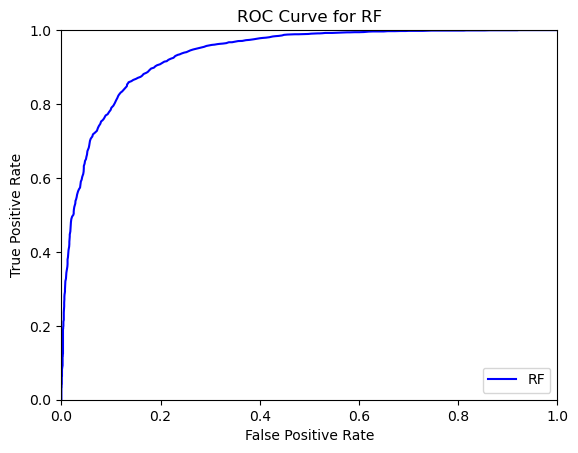

ROC AUC for RF:  0.93418784


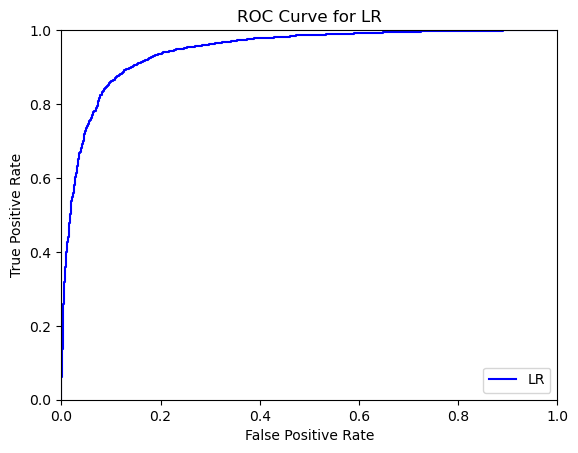

ROC AUC for LR:  0.9451231999999998


In [60]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

probs = rf_model.predict_proba(X_test_0)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

plt.title('ROC Curve for RF')
plt.plot(fpr, tpr, 'b', label = 'RF')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

preds = rf_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for RF: ',roc_auc_score(y_test, preds))

probs = lr_model.predict_proba(X_test_0)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve for LR')
plt.plot(fpr, tpr, 'b', label = 'LR')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

preds = lr_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for LR: ', roc_auc_score(y_test, preds))



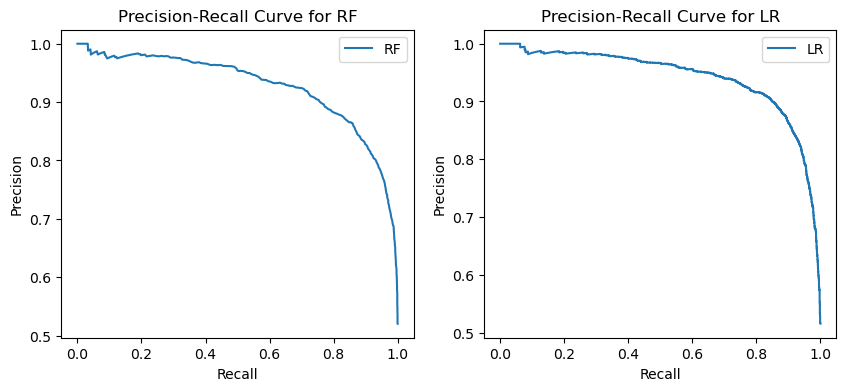

f1-score for RF:  0.8593350383631715
f1-score for LR:  0.8827613568736361


In [61]:
from sklearn.metrics import f1_score

y_score = rf_model.predict_proba(X_test_0)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(recall, precision, label='RF')
ax[0].set_title('Precision-Recall Curve for RF')
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')
ax[0].legend(loc = 'upper right')

y_score = lr_model.predict_proba(X_test_0)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

ax[1].plot(recall, precision, label='LR')
ax[1].set_title('Precision-Recall Curve for LR')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
ax[1].legend(loc = 'upper right')
plt.show()

y_pred=rf_model.predict(X_test_0)
print ('f1-score for RF: ', f1_score(y_test, y_pred))
y_pred=lr_model.predict(X_test_0)
print ('f1-score for LR: ', f1_score(y_test, y_pred))


https://www.statology.org/precision-recall-curve-python/ <br>

In [62]:
from sklearn.metrics import confusion_matrix
y_pred=rf_model.predict(X_test_0)
y_pred1=lr_model.predict(X_test_0)
wrong=[]

for i in range (len(y_pred)):
    if (y_test.values[i]!=y_pred[i] and y_test.values[i]!=y_pred1[i]):
        wrong.append(i)
min_=0
X_wrong=[]
X_right=[]
for i in range (len(y_test)):
    if (i in wrong):
        X_wrong.append(len(X_test.values[i]))
        
for i in range (len(y_test)):
    if (i not in wrong):
        X_right.append(len(X_test.values[i]))  

for i in wrong:
    print (X_test.values[i])
    print ("######################################")




Verhoeven's movie was utter and complete garbage. He's a disgusting hack of a director and should be ashamed. By his own admission, he read 2 chapters of the book, got bored, and decided to make the whole thing up from scratch.<br /><br />Heinlein would have NEVER supported that trash if he'd been alive to see it. It basically steals the name, mocks politics of the book (which is a good portion of it), and throws in some T&A so the average idiot American moviegoer doesn't get bored.<br /><br />This anime isn't perfect, but it's at least mostly accurate, as best I can tell.
######################################
This is a generally nice film, with good story, great actors and great songs. The cinematography was unfortunately bad. One of the film's weakest points is the annoying chain of sequences copied from Pretty Woman. Why? Does it hurt to attempt some originality, Abbas? Mustan? Anyone?<br /><br />The film is about a newly married couple, Raj and Priya (Salman - Rani). Priya cannot 

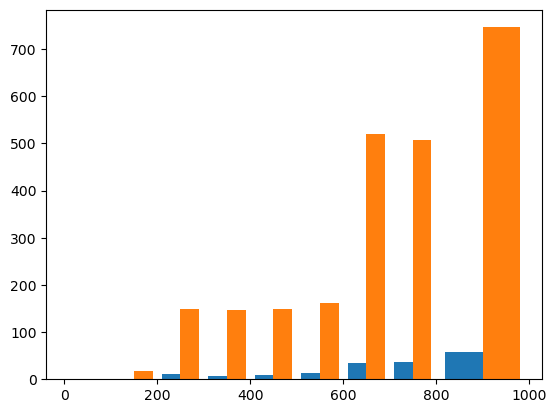

In [63]:
bin_=[0, 100, 200, 300, 400, 500, 600, 700, 800, 1000]
plt.hist([X_wrong, X_right], bins=bin_)
plt.show()


I built dependencies on the length, but it does not seem to affect the accuracy of the prediction. Perhaps the trickiest missclassified objects is neutral opinions. It's logical, because the opinions don't explicitly express delight or disgust and because both positive and negative words are used.


Which model gives higher scores? Any ideas why? Please suggest 1-2 reasons.

*Answer:* RF gives higher scores than LR. I think RF more when there are discrete, unambiguously defining object features, it's not our countvector.

### More sophisticated feature prerocessing

As we have seen, simple BOW can give us some result - it's time to improve it.

**Task 1.4 [1 point] - Frequencies calculation**

- Calculate top-20 words in train set and test set. *Are they meaningful?*
- Import `stopwords` and print some of them. What are those?
- Recalculate top-20 words in each set, but exclude stop words.
- Does now top-20 include more useful words?

In [25]:
from collections import Counter
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

str_train=''
str_test=''

for i in range (len(X_train.values)):  
    str_train=str_train+str(X_train.values[i])
    
for i in range (len(X_test.values)):  
    str_test=str_test+str(X_test.values[i])  
str_train = str_train.lower()
str_test = str_test.lower()

In [24]:
str_train = str_train.replace('/><br', '') 
str_test = str_test.replace('/><br', '')
str_train = str_train.replace('/>', '') 
str_test = str_test.replace('/>', '')

def t(pep):
    return pep[1]

tk = WhitespaceTokenizer()

tok_train=tk.tokenize(str_train)
basic_counter = Counter(tok_train)
container_C = list(basic_counter.items())
counter_values = sorted(container_C, key=t, reverse=True)
print (len(counter_values))
for i in range (20):
    print (counter_values[i][0], end=', ')
print()

tok_test=tk.tokenize(str_test)
basic_counter = Counter(tok_test)
container_C = list(basic_counter.items())
counter_values = sorted(container_C, key=t, reverse=True)
for i in range (20):
    print (counter_values[i][0], end=', ')

229908
the, a, and, of, to, is, in, i, this, that, it, was, as, with, for, but, on, movie, his, are, 
the, a, and, of, to, is, in, i, this, that, it, was, as, for, with, but, on, movie, not, his, 

Train set: the, a, and, of, to, is, in, i, this, that, it, was, as, with, for, but, on, movie, his, are <br>
Test set: the, a, and, of, to, is, in, i, this, that, it, was, as, for, with, but, on, movie, not, his <br> <br>
Obviously these words aren't meaningful.

In [25]:
stopWords = set(stopwords.words('english'))
print (stopWords)

{'some', "needn't", 'more', 'yourself', 'should', 'by', 'he', 'it', 'you', 'very', 'were', 'each', "haven't", 'out', 'hers', 'off', 'most', 'now', 'after', 'only', "isn't", 'me', 'about', 'there', 'are', 'my', 'and', 'so', 'both', 'on', 'been', "you'd", 'all', 'under', 'is', 'same', 'her', 'shouldn', "mightn't", 'for', "don't", 'what', 'be', 'with', 'yourselves', 'won', "mustn't", 'if', 'itself', "didn't", 'had', "won't", 'they', 'not', 'below', 've', "couldn't", "it's", 'once', 'over', 'further', 'does', 'why', 'will', 'theirs', 'than', 'nor', 'because', 'him', 'at', 'ain', 'between', 'd', 'who', 'our', 'ours', 'these', 'too', 'again', 'down', 'doing', 'haven', 'don', "you've", 'them', 'has', 'did', "should've", 'the', 'we', 'through', 'which', "you'll", 'while', 'needn', 'no', 'mightn', "hadn't", 'your', "wasn't", 'mustn', 'in', 'an', 'having', "doesn't", 'm', 'against', 'didn', 'then', 'whom', 'until', "shan't", 'themselves', 'own', 'a', 'have', 'or', 's', 'of', 'doesn', 'other', 'm

pronouns, prefixes, modal verbs, forms of verb 'to be', 'to have', 'do'; conjunctions, preposition, some of adjectives and adverbs and other frequent words.

In [26]:
fil_train = []

for w in tok_train:
    if w not in stopWords:
        fil_train.append(w)

basic_counter = Counter(fil_train)
container_C = list(basic_counter.items())
counter_values = sorted(container_C, key=t, reverse=True)
for i in range (20):
    print (counter_values[i][0], end=', ')
print ()
fil_test = []

for w in tok_test:
    if w not in stopWords:
        fil_test.append(w)

basic_counter = Counter(fil_test)
container_C = list(basic_counter.items())
counter_values = sorted(container_C, key=t, reverse=True)
for i in range (20):
    print (counter_values[i][0], end=', ')

movie, film, one, like, even, would, good, really, see, -, get, much, story, also, first, time, people, great, make, could, 
movie, film, one, like, good, would, even, really, see, -, get, story, much, also, first, great, time, could, make, people, 

Train set: movie, film, one, like, even, would, good, really, see, -, get, much, story, also, first, time, people, great, make, could <br>
Test set: movie, film, one, like, good, would, even, really, see, -, get, story, much, also, first, great, time, could, make, people <br>

Yes, now top-20 includes more useful words, for example adjectives characterizing objects.

**Task 1.5 [1 point] - Word Freqs by class**

How do you think, will top100 tokens for positive and negative classes be different? Use data to prove your point.

In [27]:
X_negative = reviews[reviews["sentiment"]==0]["review"] # негативные
X_positive = reviews[reviews["sentiment"]==1]["review"]
str_negative = ''
str_positive = ''

for i in range (len(X_negative.values)):  
    str_negative=str_negative+str(X_negative.values[i])
    
for i in range (len(X_positive.values)):  
    str_positive=str_positive+str(X_positive.values[i])  
str_negative = str_negative.lower()
str_positive = str_positive.lower()

In [28]:
str_negative = str_negative.replace('/><br', '') 
str_positive = str_positive.replace('/><br', '')
str_negative = str_negative.replace('/>', '') 
str_positive = str_positive.replace('/>', '')

def t(pep):
    return pep[1]

tk = WhitespaceTokenizer()
    
tok_neg=tk.tokenize(str_negative)
tok_pos=tk.tokenize(str_positive)

In [29]:
fil_neg = []

for w in tok_neg:
    if w not in stopWords:
        fil_neg.append(w)

basic_counter = Counter(fil_neg)
container_C = list(basic_counter.items())
counter_values = sorted(container_C, key=t, reverse=True)
for i in range (20):
    print (counter_values[i], end=', ')
top_neg=counter_values[0:100]
print ()
fil_pos = []

for w in tok_pos:
    if w not in stopWords:
        fil_pos.append(w)
basic_counter = Counter(fil_pos)
container_C = list(basic_counter.items())
counter_values = sorted(container_C, key=t, reverse=True)
for i in range (20):
    print (counter_values[i], end=', ')
top_pos=counter_values[0:100]

('movie', 17357), ('film', 13135), ('one', 10928), ('like', 10476), ('even', 7438), ('would', 6790), ('good', 5857), ('really', 5804), ('bad', 5345), ('see', 5024), ('get', 4858), ('-', 4761), ('much', 4532), ('could', 4487), ('make', 4455), ('people', 4031), ('time', 3948), ('made', 3800), ('first', 3788), ('story', 3713), 
('film', 14642), ('movie', 13516), ('one', 11762), ('like', 8345), ('good', 6085), ('great', 5527), ('see', 5430), ('really', 5264), ('would', 5246), ('story', 5035), ('also', 5030), ('-', 4733), ('even', 4729), ('much', 4241), ('first', 4168), ('get', 4113), ('time', 3983), ('well', 3814), ('best', 3747), ('people', 3666), 

In [30]:
count=0
for i in range(len(top_neg)):
    for j in range(len(top_pos)):
        if (top_neg[i][0]==top_pos[j][0]):
            count+=1
            break        
print (count)
    

84


*Answer:* seems that they should be different, but they have 84 words out of 100 in common. Evaluating was made without stopwords.

**Task 1.6 [2 points] - Reducing dimensionality**

The goal is to reduce number of features to 15000.

Implement the following methods of dimensinality reduction:
1. Use CountVectorizer, but leave only 15k most frequent tokens
2. Use HashingVectorizer with 15k features
3. Use 15k most important features from perspective of previously trained RandomForest

*Hints:*
- in 1 and 2 you don't have to apply nltk.corpus.stopwords, vectorizers have `stopwords` parameter
- in 1 look for `vocabulary` parameter
- in 3... remember `lab02`? You may use `X_train_0` and `X_test_0` as input matrices

Train LogisticRegression and RandomForest on each dataset and compare ROC AUC scores of the classifiers.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [27]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=15000)
count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

print(X_train_0.shape, X_test_0.shape)

rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-2)
lr_model = LogisticRegression(max_iter=1e5, n_jobs=-2)

rf_model.fit(X_train_0, y_train)
lr_model.fit(X_train_0, y_train)

preds = rf_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for RF: ', roc_auc_score(y_test, preds))

preds = lr_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for LR: ', roc_auc_score(y_test, preds))

(20000, 15000) (5000, 15000)
ROC AUC for RF:  0.9317474400000001
ROC AUC for LR:  0.9380664


For both ROC AUC were decrease.

In [33]:
count_vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=500, njobs=-2)
lr_model = LogisticRegression(max_iter=1e5, njobs=-2)

rf_model.fit(X_train_0, y_train)
lr_model.fit(X_train_0, y_train)

preds = rf_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for RF: ', roc_auc_score(y_test, preds))

preds = lr_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for LR: ', roc_auc_score(y_test, preds))

ROC AUC for LR:  0.9286424
ROC AUC for LR:  0.941472


For both ROC AUC were decrease.

In [38]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-2)

rf_model.fit(X_train_0, y_train)
rf_model.feature_importances_

ind=np.argsort(rf_model.feature_importances_)[::-1]
ind=ind[0:15000]
X_train_new=X_train_0[:, ind]
X_test_new=X_test_0[:, ind]

rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-2)
lr_model = LogisticRegression(max_iter=1e5, n_jobs=-2)
rf_model.fit(X_train_new, y_train)
lr_model.fit(X_train_new, y_train)

preds = rf_model.predict_proba(X_test_new)[:, 1]
print ('ROC AUC for RF: ', roc_auc_score(y_test, preds))

preds = lr_model.predict_proba(X_test_new)[:, 1]
print ('ROC AUC for LR: ', roc_auc_score(y_test, preds))

ROC AUC for RF:  0.93181336
ROC AUC for LR:  0.9413385599999999


For both ROC AUC were decrease.

**Task 1.7 [2 points] - Token Normalization**

Choose the best working method from previous task. Try improve it by applying a token normalization technique.

You may use one of normalizers imported below, but feel free to experiment.

Do the following:
- Apply normalizer to X_train, X_test
- Build BOW with CountVectorizer + stopwords. What are the shapes of train and test matrices now?
- Reduce dimensionality with the best method from Task 2.6. You may try all of them
- Train LR/RF to examine whether ROC AUC or Accuracy was improved.

In [28]:
from nltk.stem import WordNetLemmatizer, PorterStemmer #with noun
nltk.download('wordnet')
nltk.download('omw-1.4')
tk = WhitespaceTokenizer()
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(X)
X_train_0 = count_vectorizer.transform(X_train)
X_test_0 = count_vectorizer.transform(X_test)
wnl = WordNetLemmatizer()
new_X_train=[]
for text in X_train:
    text=tk.tokenize(text)
    text = [wnl.lemmatize(word, pos='v') for word in text]
    text = " ".join(text)
    new_X_train.append(text)
    
new_X_test=[]
for text in X_test:
    text=tk.tokenize(text)
    text = [wnl.lemmatize(word, pos='v') for word in text]
    text = " ".join(text)
    new_X_test.append(text)
    
new_X=new_X_train+new_X_test

count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(new_X)

X_train_0 = count_vectorizer.transform(new_X_train)
X_test_0 = count_vectorizer.transform(new_X_test)
print(X_train_0.shape, X_test_0.shape)

count_vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
count_vectorizer.fit(new_X)

X_train_0 = count_vectorizer.transform(new_X_train)
X_test_0 = count_vectorizer.transform(new_X_test)
print(X_train_0.shape, X_test_0.shape)
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-2)
lr_model = LogisticRegression(max_iter=1e5, n_jobs=-2)

rf_model.fit(X_train_0, y_train)
lr_model.fit(X_train_0, y_train)
print ('Lemmatizer: ')
preds = rf_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for RF: ',roc_auc_score(y_test, preds))
preds = lr_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for LR: ', roc_auc_score(y_test, preds))

clf_predictions = []

pred = rf_model.predict(X_test_0)
clf_predictions.append(pred)
pred = lr_model.predict(X_test_0)
clf_predictions.append(pred)    
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]

print (accuracies)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sharlotte\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sharlotte\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(20000, 70204) (5000, 70204)
(20000, 15000) (5000, 15000)
Lemmatizer: 
ROC AUC for RF:  0.92577008
ROC AUC for LR:  0.9393654399999999
[0.8496, 0.8664]


The shapes of train matrix: (20000, 70204) <br>
The shapes of test matrix: (5000, 70204)

For both ROC AUC and accuracies were decrease.

In [29]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-2)
lr_model = LogisticRegression(max_iter=1e5, n_jobs=-2)
ps = PorterStemmer()
new_X_train=[]
for text in X_train:
    text=tk.tokenize(text)
    text = [ps.stem(word) for word in text]
    text = " ".join(text)
    new_X_train.append(text)


new_X_test=[]
for text in X_test:
    text=tk.tokenize(text)
    text = [ps.stem(word) for word in text]
    text = " ".join(text)
    new_X_test.append(text)
new_X=new_X_train+new_X_test

count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer.fit(new_X)
X_train_0 = count_vectorizer.transform(new_X_train)
X_test_0 = count_vectorizer.transform(new_X_test)

print(X_train_0.shape, X_test_0.shape)

count_vectorizer = HashingVectorizer(stop_words='english', n_features=15000)
count_vectorizer.fit(new_X)

X_train_0 = count_vectorizer.transform(new_X_train)
X_test_0 = count_vectorizer.transform(new_X_test)
print(X_train_0.shape, X_test_0.shape)

rf_model.fit(X_train_0, y_train)
lr_model.fit(X_train_0, y_train)
print ('Stemmer:') 
preds = rf_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for RF: ',roc_auc_score(y_test, preds))
preds = lr_model.predict_proba(X_test_0)[:, 1]
print ('ROC AUC for LR: ', roc_auc_score(y_test, preds))

clf_predictions = []

pred = rf_model.predict(X_test_0)
clf_predictions.append(pred)
pred = lr_model.predict(X_test_0)
clf_predictions.append(pred)
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]

print (accuracies)

(20000, 71201) (5000, 71201)
(20000, 15000) (5000, 15000)
Stemmer:
ROC AUC for RF:  0.92871232
ROC AUC for LR:  0.93802288
[0.851, 0.8608]


For both ROC AUC and accuracies were decrease.

## Part 2. Word Embeddings [7 points]

In [30]:
import gensim.downloader

Here is the list of pretrained word embedding models. We suggest using `glove-wiki-gigaword-100`.

In [31]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [32]:
word_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

**Task 2.1 [1 point] - WordEmbeddings Geometry**

As you probably know, vector space of word embeddings has non-trivial geometry: some word relations (like country-capital or single-plural) cab be represented by vectors, like: **(king - man) + woman = queen**

<img src="https://linkme.ufanet.ru/images/5687a2011b49eb2413912f1c7d0fb0bd.png" width=600px>

Check this statement on words from the above picture with `word_embeddings.most_similar` function. Pay attention to `positive` and `negative` params.

Provide **several** examples, make sure to present different relations: some for nouns, some for verbs, etc.

In [72]:
print ('woman+(king-man): ', word_embeddings.most_similar(positive=['woman', 'king'], negative=['man'])[0])
# noun
print ('dog+(cats-cat): ',word_embeddings.most_similar(positive=['cats', 'dog'], negative=['cat'])[0])
print ('france+(london-englad): ',word_embeddings.most_similar(positive=['france', 'london'], negative=['england'])[0])
print ('france+(london-paris): ', word_embeddings.most_similar(positive=['france', 'london'], negative=['paris'])[0:2]) 
print ('girl+(daughter-father): ', word_embeddings.most_similar(positive=['girl', 'daughter'], negative=['father'])[0]) 
# pronoun
print ('she+(himself-he): ', word_embeddings.most_similar(positive=['she', 'himself'], negative=['he'])[0]) 
# adjective
print ('long+(faster-fast): ',word_embeddings.most_similar(positive=['long', 'faster'], negative=['fast'])[0]) 
print ('faster+(longest-longer): ',word_embeddings.most_similar(positive=['longest', 'faster'], negative=['longer'])[0]) 
print ('slow+(faster-fast): ',word_embeddings.most_similar(positive=['slow', 'faster'], negative=['fast'])[0]) 
# verb
print ('run+(jumps-jump): ',word_embeddings.most_similar(positive=['run', 'jumps'], negative=['jump'])[0])
print ('go+(jumped-jump): ',word_embeddings.most_similar(positive=['go', 'jumped'], negative=['jump'])[0])
print ('had+(jumps-jump): ',word_embeddings.most_similar(positive=['had', 'jumps'], negative=['jump'])[0])

woman+(king-man):  ('queen', 0.7698541283607483)
dog+(cats-cat):  ('dogs', 0.8747850656509399)
france+(london-englad):  ('paris', 0.8751187920570374)
france+(london-paris):  [('britain', 0.8921419978141785), ('england', 0.8002905249595642)]
girl+(daughter-father):  ('boy', 0.7254757881164551)
she+(himself-he):  ('herself', 0.9654035568237305)
long+(faster-fast):  ('longer', 0.7214094996452332)
faster+(longest-longer):  ('fastest', 0.7048643827438354)
slow+(faster-fast):  ('slower', 0.8117425441741943)
run+(jumps-jump):  ('runs', 0.7688974738121033)
go+(jumped-jump):  ('went', 0.7161274552345276)
had+(jumps-jump):  ('has', 0.7105494737625122)


**Task 2.2 [2 point] - POS analysis**

Use POS tagger to calculate most common POS in the dataset. 
Here you may read about nltk-taggers: [link](https://www.inf.ed.ac.uk/teaching/courses/icl/nltk/tagging.pdf)

- If you were to design POS-related weights, how would you do it? 
- What POS would get the higher weight? 

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')

str_train=''
str_test=''

for i in range (len(X_train.values)):  
    str_train=str_train+str(X_train.values[i])
    
for i in range (len(X_test.values)):  
    str_test=str_test+str(X_test.values[i]) 
    
str_ = str_train+str_test
str_ = str_.lower()

str_ = str_.replace('/><br', '') 
str_ = str_.replace('/>', '') 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sharlotte\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [72]:
tk = WhitespaceTokenizer()
tok=tk.tokenize(str_)

In [35]:
k=nltk.pos_tag(tok)

In [37]:
d={}
for i in range (len(k)):
    pos=str(k[i][1])
    if (d.get(pos)==None):
        d2 = {pos: 1}
        d.update(d2)
    else:
        d[pos]+=1

def t(pep):
    return pep[1]

list_d=list(d.items())
list_d=sorted(list_d, key=t, reverse=True)

weight=[]
for i in range (len(list_d)):
    weight.append([list_d[i][0], 1/list_d[i][1]])
print (weight)

[['NN', 7.809504322951118e-07], ['IN', 1.493156862100991e-06], ['DT', 1.517655646969014e-06], ['JJ', 1.7025536602349865e-06], ['RB', 3.05055687915829e-06], ['VBZ', 4.132658332472363e-06], ['VB', 4.316969142304571e-06], ['CC', 4.486095347470515e-06], ['NNS', 4.650946467606158e-06], ['PRP', 5.174751353197479e-06], ['VBD', 6.033874169588068e-06], ['VBP', 6.072862200683805e-06], ['TO', 7.454620000745462e-06], ['VBN', 8.794223953707205e-06], ['VBG', 9.271277582050807e-06], ['PRP$', 1.1950001195000119e-05], ['CD', 1.5926102882624623e-05], ['MD', 1.8461424852770137e-05], ['WP', 2.8575510787255323e-05], ['WRB', 3.0347171643602817e-05], ['WDT', 3.1103231625765914e-05], ['NNP', 3.268614761064261e-05], ['RP', 3.872816699585609e-05], ['JJS', 5.490282200505106e-05], ['JJR', 5.9112135721463615e-05], ['EX', 8.259684480052862e-05], [':', 8.4224711530363e-05], ['RBR', 9.629272989889263e-05], ['PDT', 9.822217856792063e-05], ['RBS', 0.00018982536066818528], ['FW', 0.0002846569883290635], ['.', 0.00044052

1) Weights inverse to frequency <br>
2) POS that are less common would get the higher weight

**Task 2.3 [4 points] - WordEmbeddings**

Use dense vector representations to construct vector-representation of each review, then train a model (LR or RF).

Compare results of the new model to results of the models above.

**Important**
- If you just sum embeddings of each token to get an embedding of the whole review, the cost of the task is **[2 points]**
- For **[4 points]** you have to use either TF-IDF weight or weights that you designed from POS tags.